In [72]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [37]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [38]:
df2 = pd.get_dummies(df)
df2.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [39]:
df3 = df2.drop(['gender_female', 'race/ethnicity_group E', 'parental level of education_some high school', 'lunch_standard', 'test preparation course_none'], axis = 1)
df3.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_free/reduced,test preparation course_completed
0,72,72,74,0,0,1,0,0,0,1,0,0,0,0,0
1,69,90,88,0,0,0,1,0,0,0,0,0,1,0,1
2,90,95,93,0,0,1,0,0,0,0,0,1,0,0,0
3,47,57,44,1,1,0,0,0,1,0,0,0,0,1,0
4,76,78,75,1,0,0,1,0,0,0,0,0,1,0,0


In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## KMeans

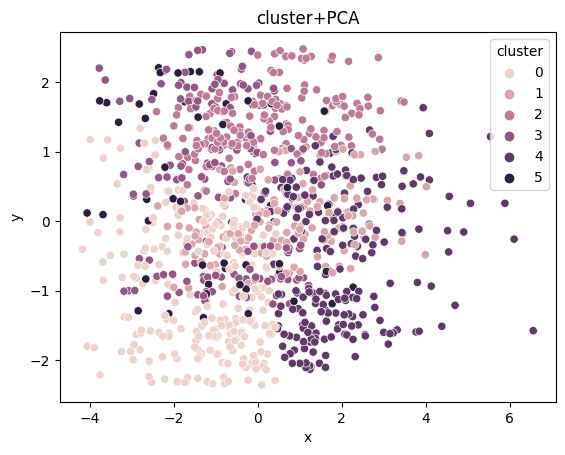

In [50]:
X = df3
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(data=X, columns=df3.columns)
kmeans = KMeans(n_clusters=6)
cluster = kmeans.fit_predict(X)
pca2D = PCA(n_components=2)
pca_2D = pca2D.fit_transform(X)
pca2D_df = pd.DataFrame(data=pca_2D,columns=['x','y'])
pca2D_df['cluster'] = cluster
sns.scatterplot(x='x',y='y',hue='cluster',data=pca2D_df)
plt.title("cluster+PCA")
plt.show()

## DbScan

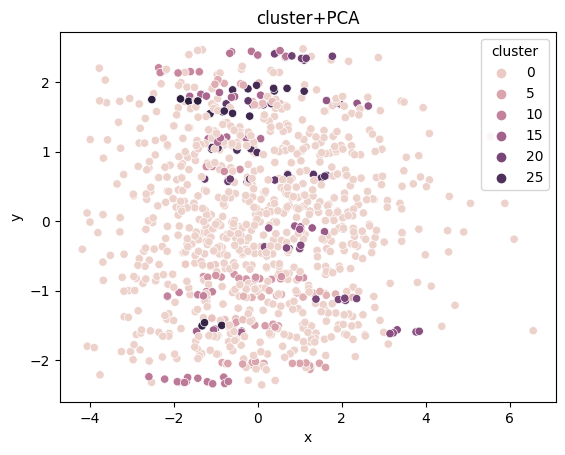

In [76]:
X = df3
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(data=X, columns=df3.columns)
dbscan = DBSCAN(eps=0.8, min_samples=5)
clusters = dbscan.fit_predict(X)
pca2D = PCA(n_components=2)
pca_2D = pca2D.fit_transform(X)
pca2D_df = pd.DataFrame(data=pca_2D,columns=['x','y'])
pca2D_df['cluster'] = clusters
sns.scatterplot(x='x',y='y',hue='cluster',data=pca2D_df)
plt.title("cluster+PCA")
plt.show()

## Иерархическая кластеризация

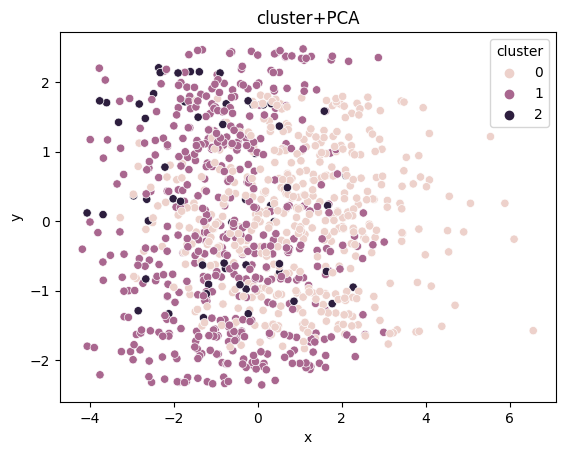

In [77]:
X = df3
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(data=X, columns=df3.columns)
agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(X)
pca2D = PCA(n_components=2)
pca_2D = pca2D.fit_transform(X)
pca2D_df = pd.DataFrame(data=pca_2D,columns=['x','y'])
pca2D_df['cluster'] = clusters
sns.scatterplot(x='x',y='y',hue='cluster',data=pca2D_df)
plt.title("cluster+PCA")
plt.show()

## Вычисляем метрику силуэта, а также пользуемся методом локтя

Для clusters = 2 Средняя метрика силуэта: 0.08410593298289794
Для clusters = 3 Средняя метрика силуэта: 0.1307761636690067
Для clusters = 4 Средняя метрика силуэта: 0.20304524718586198
Для clusters = 5 Средняя метрика силуэта: 0.12492886577608198
Для clusters = 6 Средняя метрика силуэта: 0.20146019627491316
Для clusters = 7 Средняя метрика силуэта: 0.20474255153595966
Для clusters = 8 Средняя метрика силуэта: 0.22938573977972032
Для clusters = 9 Средняя метрика силуэта: 0.20672490023672468


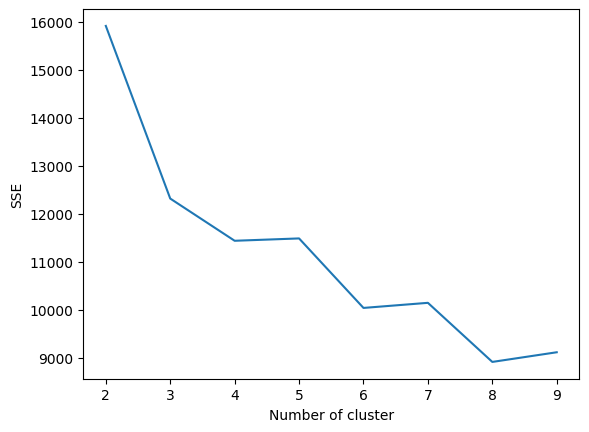

In [64]:
data = X

sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    clusters = kmeans.fit_predict(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouette_avg = silhouette_score(data, clusters)
    print("Для clusters =", k,
          "Средняя метрика силуета:", silhouette_avg)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Воспользуемся TSNE и посмотрим на метод локтя

In [65]:
from sklearn.manifold import TSNE 

In [66]:
tsne = TSNE(n_components = 2, verbose = 1, random_state = 42)
Z = tsne.fit_transform(X) 
# # Z = pd.DataFrame(data=Z)
# # Z['cluster'] = cluster
# sns.scatterplot(x='x',y='y',hue='cluster',data=Z)
# plt.title("cluster+TSNE")
# plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.733017
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.446106
[t-SNE] KL divergence after 1000 iterations: 0.462331


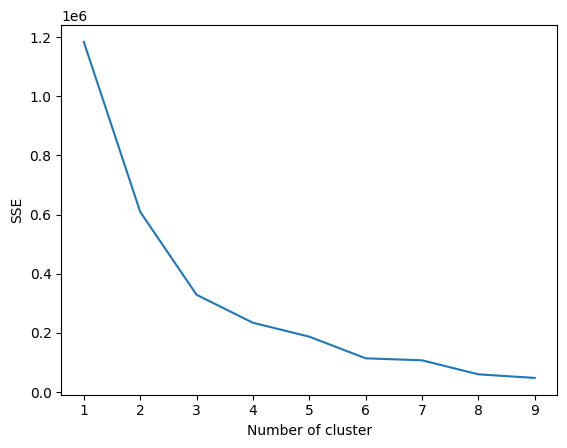

In [67]:
data = Z
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Теперь также откластеризуем, еще воспользовавшись PCA

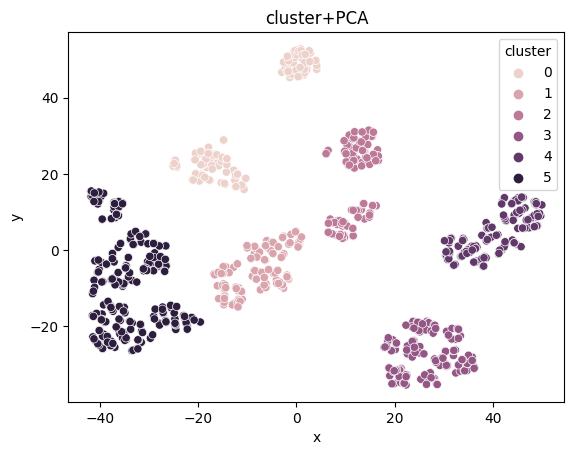

In [82]:
kmeans = KMeans(n_clusters=6)
cluster = kmeans.fit_predict(Z)
pca2D = PCA(n_components=2)
pca_2D = pca2D.fit_transform(Z)
pca2D_df = pd.DataFrame(data=pca_2D,columns=['x','y'])
pca2D_df['cluster'] = cluster
sns.scatterplot(x='x',y='y',hue='cluster',data=pca2D_df)
plt.title("cluster+PCA")
plt.show()

## Посмотрим на средние значения по экзаменам в кластерах

In [85]:
fin_df = df
fin_df['cluster'] = cluster
fin_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,5
1,female,group C,some college,standard,completed,69,90,88,4
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,4


In [87]:
mean_math_score_per_cluster = fin_df.groupby('cluster')['math score'].mean()
mean_reading_score_per_cluster = fin_df.groupby('cluster')['reading score'].mean()
mean_writing_score_per_cluster = fin_df.groupby('cluster')['writing score'].mean()

print(mean_math_score_per_cluster)
print(mean_reading_score_per_cluster)
print(mean_reading_score_per_cluster)

cluster
0    64.357143
1    76.153846
2    71.560606
3    63.842767
4    71.306667
5    57.594203
Name: math score, dtype: float64
cluster
0    68.450000
1    76.755245
2    77.628788
3    67.358491
4    74.073333
5    59.934783
Name: reading score, dtype: float64
cluster
0    68.450000
1    76.755245
2    77.628788
3    67.358491
4    74.073333
5    59.934783
Name: reading score, dtype: float64


# Значения иногда даже совпадают, так как при кластеризации мы учитывали еще много других признаков